In [1]:
from tensorflow.python.keras import Input
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Read dataset and select 'Inches' and 'Price' columns
dataset = pd.read_csv('Lab09_uncleaned_laptopData.csv')
print(f"There are {len(dataset.index)} instances.")
dataset
# select column
dataset_columns = ['Inches', 'Ram', 'Memory', 'Price']
dataset = dataset[dataset_columns]
dataset

There are 1303 instances.


,Inches,Ram,Memory,Price
0,13.3,8GB,128GB SSD,71378.6832
1,13.3,8GB,128GB Flash Storage,47895.5232
2,15.6,8GB,256GB SSD,30636.0000
3,15.4,16GB,512GB SSD,135195.3360
4,13.3,8GB,256GB SSD,96095.8080
...,...,...,...,...
1298,14,4GB,128GB SSD,33992.6400
1299,13.3,16GB,512GB SSD,79866.7200
1300,14,2GB,64GB Flash Storage,12201.1200
1301,15.6,6GB,1TB HDD,40705.9200


In [3]:
# Example function to convert strings like '8GB' to just 8
def clean_memory(memory_series, columns_array):
    for column in columns_array:
        # Ensure it's a string, extract the digits, convert to float, and drop any NaNs
        memory_series[column] = memory_series[column].astype(str).str.extract(r'(\d+)')[0].astype(float).dropna()
    return memory_series


# Clean columns
clean_memory(dataset, dataset_columns)

dataset

,Inches,Ram,Memory,Price
0,13.0,8.0,128.0,71378.0
1,13.0,8.0,128.0,47895.0
2,15.0,8.0,256.0,30636.0
3,15.0,16.0,512.0,135195.0
4,13.0,8.0,256.0,96095.0
...,...,...,...,...
1298,14.0,4.0,128.0,33992.0
1299,13.0,16.0,512.0,79866.0
1300,14.0,2.0,64.0,12201.0
1301,15.0,6.0,1.0,40705.0


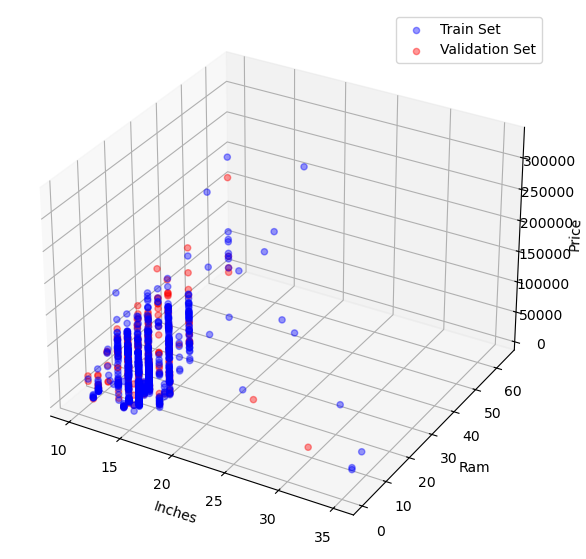

In [4]:
# Split dataset and plot graph
def split_dataset(dataset, train_frac=0.7):
    train = dataset.sample(frac=train_frac, random_state=42)
    val = dataset.drop(train.index)
    # Drop rows where 'Inches', 'Ram', 'Memory', or 'Price' is missing
    train = train.dropna(subset=['Inches', 'Ram', 'Memory', 'Price'])
    val = val.dropna(subset=['Inches', 'Ram', 'Memory', 'Price'])
    return train, val

train, validation = split_dataset(dataset, train_frac=0.7)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting train set
train_plot = ax.scatter(train['Inches'], train['Ram'], train['Price'], c='blue', alpha=0.4, label='Train Set')
# Plotting validation set
val_plot = ax.scatter(validation['Inches'], validation['Ram'], validation['Price'], c='red', alpha=0.4, label='Validation Set')

# Axis labels
ax.set_xlabel('Inches')
ax.set_ylabel('Ram')
ax.set_zlabel('Price')

# Adding the legend
ax.legend(loc='best')

# Show the plot
plt.show()


In [5]:
import tensorflow as tf
import keras
from keras import layers, models

In [16]:
# resetting
tf.keras.backend.clear_session()

# Function to create a new model
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(3,))) # set to amount of x
    model.add(keras.layers.Dense(200, activation='sigmoid'))
    model.add(keras.layers.Dense(200, activation='sigmoid'))
    model.add(keras.layers.Dense(200, activation='sigmoid'))
    model.add(keras.layers.Dense(1, activation='linear'))
    return model

# Create a new model instance
model = create_model()
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200)            │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,401 (317.97 KB)

 Trainable params: 81,401 (317.97 KB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
# Train:
loss = 'mse'
metric = 'mae'

epochs = 1750 # number of times training

target_column = 'Price'
# dataset is split ‘X’ as input to model
# ‘Y’ as the expected output of model 
x_train, y_train = train.drop(columns=[target_column]), train[target_column]
x_val, y_val = validation.drop(columns=[target_column]), validation[target_column]

# After splitting, check shapes
print("Train Features Shape:", x_train.shape)
print("Train Target Shape:", y_train.shape)
print("Validation Features Shape:", x_val.shape)
print("Validation Target Shape:", y_val.shape)


Train Features Shape: (892, 3)
Train Target Shape: (892,)
Validation Features Shape: (379, 3)
Validation Target Shape: (379,)


In [18]:
# Compile and fit the model
model.compile(loss=loss, optimizer='adam', metrics=[metric])
history = model.fit(x_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(x_val, y_val))

Epoch 1/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4730662912.0000 - mae: 58297.7461 - val_loss: 5240064000.0000 - val_mae: 61694.6289
Epoch 2/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4962029568.0000 - mae: 59098.0664 - val_loss: 5239613952.0000 - val_mae: 61690.9805
Epoch 3/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4971821568.0000 - mae: 60237.5898 - val_loss: 5239378944.0000 - val_mae: 61689.0781
Epoch 4/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4708421120.0000 - mae: 58342.7812 - val_loss: 5239164928.0000 - val_mae: 61687.3438
Epoch 5/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4876597248.0000 - mae: 59009.7852 - val_loss: 5238957056.0000 - val_mae: 61685.6641
Epoch 6/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5090095616.0000 - mae: 60705.5859 - val_loss: 5238755840.0000 - val_mae: 61684.0273
Epoch 7/1750
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4833421312.0000 - mae: 59349.4531 - val_loss: 5238559232.0000 - val_mae: 61

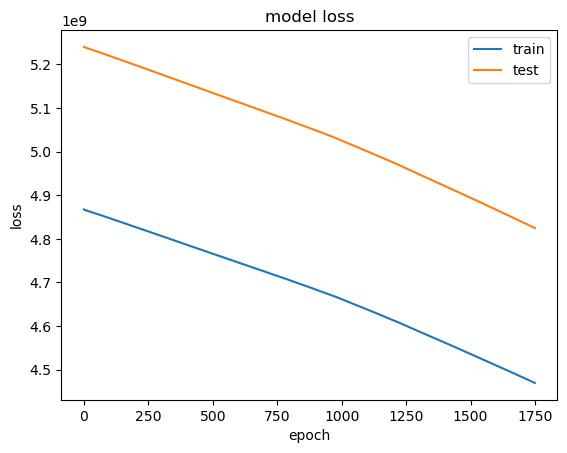

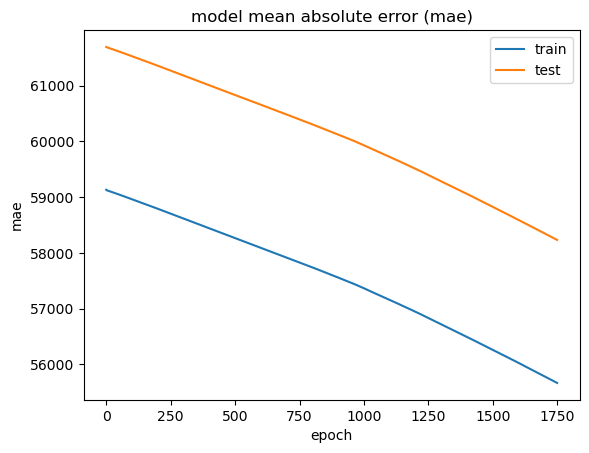

In [19]:
# Display loss:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
# Display metric:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error (mae)')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()
